In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('Stars.csv')

In [3]:
cols=data.columns.values
cols

array(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'],
      dtype=object)

In [4]:
data.head(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [5]:
data.tail(10)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
230,24145,382993.0,1494.0,-8.84,Blue-white,B,5
231,38234,272830.0,1356.0,-9.29,Blue,O,5
232,32489,648430.0,1948.5,-10.84,Blue,O,5
233,27739,849420.0,1252.0,-7.59,Blue-white,B,5
234,21904,748490.0,1130.0,-7.67,Blue-white,B,5
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [6]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [7]:
numerical_columns=['Temperature','L','R','A_M']

In [8]:
data.describe(include=['O'])

,Color,Spectral_Class
count,240,240
unique,17,7
top,Red,M
freq,112,111


In [9]:
def missing_data(data):
    total=data.isnull().sum()
    percent=(total/data.isnull().count())*100
    tt=pd.concat([total,percent],axis=1,keys=['total','percent'])
    tt.sort_values(by='total',ascending=False)
    return np.transpose(tt)
    

In [10]:
mis_data=missing_data(data)
mis_data

,Temperature,L,R,A_M,Color,Spectral_Class,Type
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
sc=StandardScaler()
data[numerical_columns]=sc.fit_transform(data[numerical_columns])
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,-0.779382,-0.598624,-0.459210,1.116745,Red,M,0
1,-0.782110,-0.598624,-0.459241,1.162414,Red,M,0
2,-0.828477,-0.598624,-0.459342,1.362213,Red,M,0
3,-0.807496,-0.598624,-0.459229,1.167171,Red,M,0
4,-0.897819,-0.598624,-0.459340,1.491607,Red,M,0


In [12]:
X=data.drop('Type',1)
y=data['Type']

<AxesSubplot:xlabel='Type', ylabel='count'>

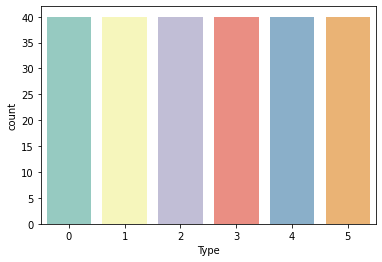

In [13]:
sns.countplot(data['Type'],palette='Set3')#🎶😎

<AxesSubplot:>

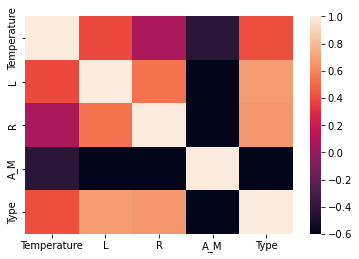

In [14]:
corrmat=data.corr()
sns.heatmap(corrmat,vmin=-0.6)

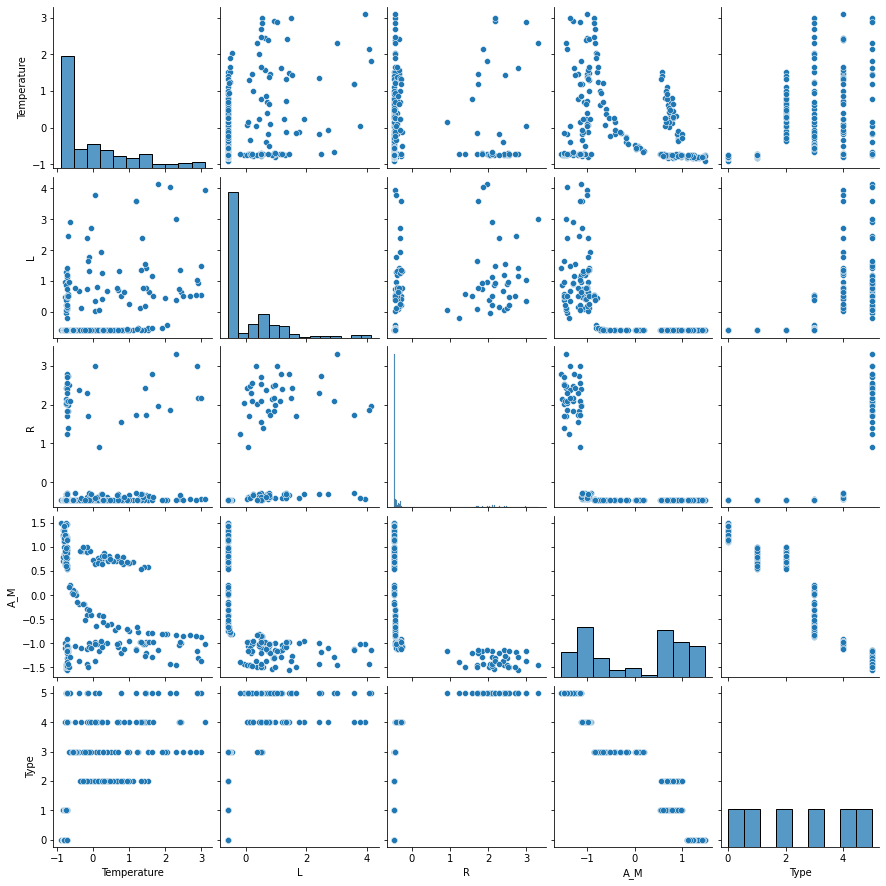

In [15]:
sns.pairplot(data)


In [16]:
newdata=pd.get_dummies(data,prefix=['Color','Spectral_Class'],columns=['Color','Spectral_Class'])
newdata.columns.values

array(['Temperature', 'L', 'R', 'A_M', 'Type', 'Color_Blue',
       'Color_Blue White', 'Color_Blue white', 'Color_Blue-White',
       'Color_Blue-white', 'Color_Orange', 'Color_Orange-Red',
       'Color_Pale yellow orange', 'Color_Red', 'Color_White',
       'Color_White-Yellow', 'Color_Whitish', 'Color_Yellowish',
       'Color_Yellowish White', 'Color_white', 'Color_yellow-white',
       'Color_yellowish', 'Spectral_Class_A', 'Spectral_Class_B',
       'Spectral_Class_F', 'Spectral_Class_G', 'Spectral_Class_K',
       'Spectral_Class_M', 'Spectral_Class_O'], dtype=object)

In [17]:
newdata.head()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,-0.779382,-0.598624,-0.459210,1.116745,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-0.782110,-0.598624,-0.459241,1.162414,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.828477,-0.598624,-0.459342,1.362213,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,-0.807496,-0.598624,-0.459229,1.167171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.897819,-0.598624,-0.459340,1.491607,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:

newdata.shape

(240, 29)

In [20]:
X=newdata.drop('Type',1)
y=newdata['Type']
X.shape

(240, 28)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True,random_state=10,test_size=0.3)
X_train.shape,y_train.shape

((168, 28), (168,))

In [53]:
def choose_the_best_model(models,X_train,y_train,X_test,y_test):
    accuracy=[]
    for i in models:
        model=i
        model.fit(X_train,y_train)
        accuracy.append(model.score(X_test,y_test))
        
    result={"models":models,"accuracy":accuracy}
    result=pd.DataFrame(result).sort_values(by='accuracy',ascending=False)
    return result


In [54]:
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]

choose_the_best_model(models,X_train,y_train,X_test,y_test)

,models,accuracy
1,"(DecisionTreeClassifier(max_features='auto', r...",1.000000
2,DecisionTreeClassifier(),1.000000
0,LogisticRegression(),0.972222
3,KNeighborsClassifier(),0.972222
4,GaussianNB(),0.972222
